In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
look_fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))
look_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create train-test split

In [31]:
X = fruits[['color_score', 'width', 'height']]
y = fruits[['fruit_label']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
y_train['fruit_label'].values

array([3, 4, 2, 1, 3, 4, 3, 3, 4, 1, 4, 3, 1, 2, 3, 1, 4, 1, 4, 1, 1, 3, 1,
       4, 4, 4, 3, 1, 1, 4, 3, 2, 1, 3, 1, 1, 1, 3, 4, 2, 1, 4, 4, 4])

/mnt/data1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


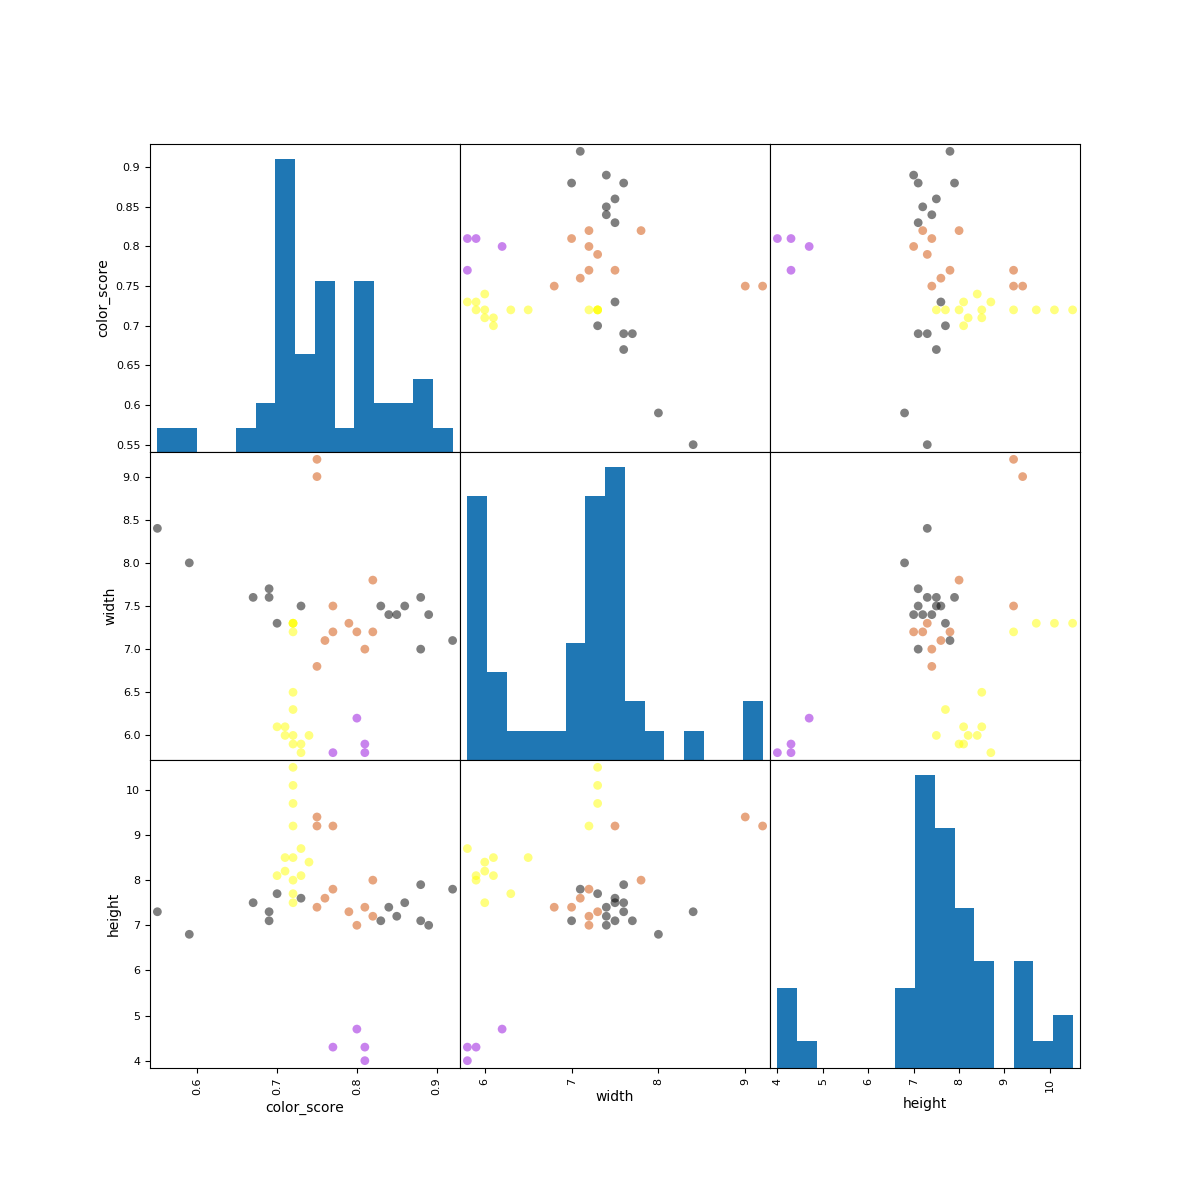

In [34]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.tools.plotting.scatter_matrix(X_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap, c=y_train['fruit_label'].values)

<IPython.core.display.Javascript object>


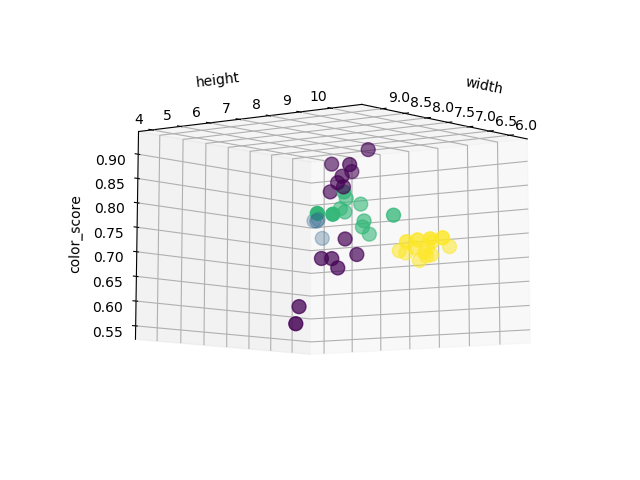

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train['fruit_label'], marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [36]:
X_train.columns

Index(['color_score', 'width', 'height'], dtype='object')

## Applied Machine Learning, Week 1: A simple classification task

### Import required modules and load data file

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
lookup_fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))


In [5]:
X = fruits[['mass', 'width', 'height']]
y = fruits[['fruit_label']]

### Create train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


### Train the classifier (fit the estimator) using the training data

In [23]:
classifier = knn.fit(X_train, y_train)

/mnt/data1/anaconda3/envs/coursera/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [24]:
knn.score(X_test, y_test)

0.53333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [10]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [11]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k_NN classifier

In [12]:
from adspy_shared_utilities import plot_fruit_knn

/mnt/data1/project/tutorials/python-machine-learning/module1/adspy_shared_utilities.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_mat, y_mat)


<IPython.core.display.Javascript object>


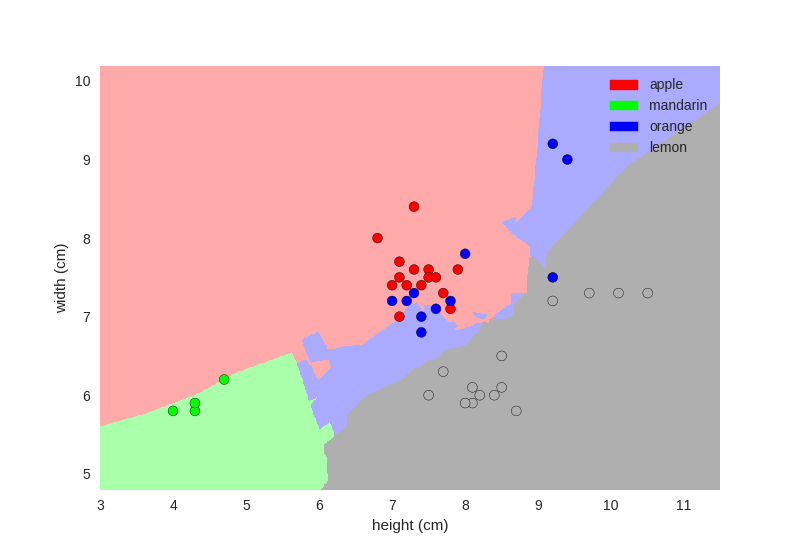

In [15]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

/mnt/data1/anaconda3/envs/coursera/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


<IPython.core.display.Javascript object>


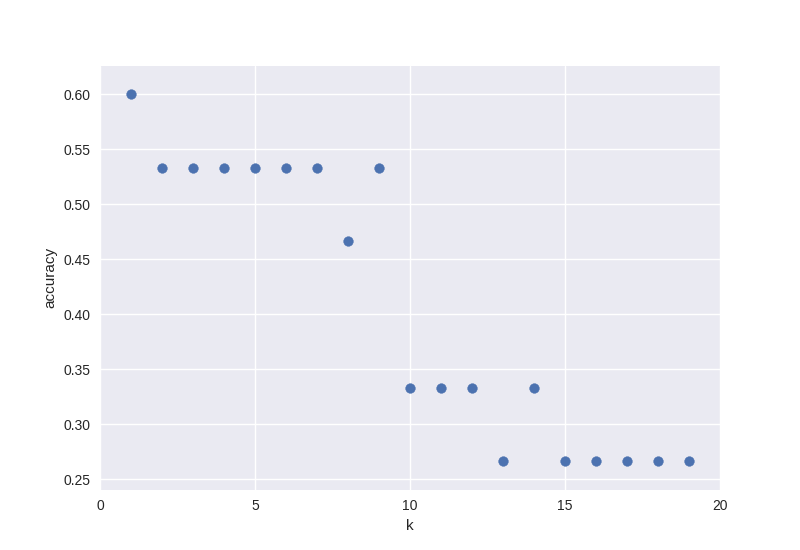

([<matplotlib.axis.XTick at 0x7f4ebb4e3748>,
 <a list of 5 Text xticklabel objects>)

In [25]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])